<a href="https://colab.research.google.com/github/Templasan/DSM---Projeto-de-API-1-Semestre/blob/main/C%C3%B3pia_de_exportacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar pandas


In [ ]:
import pandas as pd
import numpy as np


Importar base de dados

In [ ]:
#NECESSARIO DADOS DE 2013 A 2023
exportacoes2013 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2013_MUN.csv'
exportacoes2014 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2014_MUN.csv'
exportacoes2015 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2015_MUN.csv'
exportacoes2016 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2016_MUN.csv'
exportacoes2017 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2017_MUN.csv'
exportacoes2018 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2018_MUN.csv'
exportacoes2019 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2019_MUN.csv'
exportacoes2020 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2020_MUN.csv'
exportacoes2021 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2021_MUN.csv'
exportacoes2022 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2022_MUN.csv'
exportacoes2023 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2023_MUN.csv'


#tabelas para integrar codigos
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'
pais = 'https://balanca.economia.gov.br/balanca/bd/tabelas/PAIS.csv'

#Leitura da tabela 2013 e tabelas de codigos
df = pd.read_csv(exportacoes2013, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1", usecols=['CO_MUN_GEO', 'NO_MUN'])
df_sh4 = pd.read_csv(sh4, sep=';', encoding='latin-1', usecols=['CO_SH4', 'NO_SH4_POR'])
df_pais = pd.read_csv(pais, sep=";",encoding="latin1", usecols=['CO_PAIS', 'NO_PAIS'])

### IMPORTAR TODOS OS DADOS DESDE 2013 SOMENTE QUANDO NECESSARIO

In [ ]:
#LER TODOS AS TABELAS
df_2014 = pd.read_csv(exportacoes2014, sep=";", encoding="latin1")
df_2015 = pd.read_csv(exportacoes2015, sep=";", encoding="latin1")
df_2016 = pd.read_csv(exportacoes2016, sep=";", encoding="latin1")
df_2017 = pd.read_csv(exportacoes2017, sep=";", encoding="latin1")
df_2018 = pd.read_csv(exportacoes2018, sep=";", encoding="latin1")
df_2019 = pd.read_csv(exportacoes2019, sep=";", encoding="latin1")
df_2020 = pd.read_csv(exportacoes2020, sep=";", encoding="latin1")
df_2021 = pd.read_csv(exportacoes2021, sep=";", encoding="latin1")
df_2022 = pd.read_csv(exportacoes2022, sep=";", encoding="latin1")
df_2023 = pd.read_csv(exportacoes2023, sep=";", encoding="latin1")

#ADICIONAR A DATAFRAME PRINCIPAL

df = pd.concat([df,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021,df_2022,df_2023])

#verificando tamanho do df geral
print(df.info(memory_usage="deep"))
print(f"Tamanho do DataFrame: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")


KeyboardInterrupt: 

In [ ]:
df.('/content/drive/MyDrive/Colab Notebooks/DF/EXP_2013_2018_MUN.parquet',engine='pyarrow', compression='snappy')


### COMEÇAR TRATAMENTO DE DADOS

In [ ]:
#Renomear colunas antes de mesclar dados para compatibilidade
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})
df_sh4 = df_sh4.rename(columns={"CO_SH4": "SH4", "NO_SH4_POR": "PRODUTO"})

#remover duplicatas de sh4
df_sh4 = df_sh4.drop_duplicates(subset=["SH4"])


#mesclar DF
df_mescla = df.merge(df_mun, on=["CO_MUN"], how="left")
df_mescla = df_mescla.merge(df_sh4, on=["SH4"], how="left")
df_mescla = df_mescla.merge(df_pais, on=["CO_PAIS"], how="left")

display(df_mescla.head())

,CO_ANO,CO_MES,SH4,CO_PAIS,SG_UF_MUN,CO_MUN,KG_LIQUIDO,VL_FOB,NO_MUN,PRODUTO,NO_PAIS
0,2013,6,8501,63,PR,4106902,780,76547,CURITIBA,"Motores e geradores, elétricos, exceto os grup...",Argentina
1,2013,6,9503,586,SC,4213203,886,9277,POMERODE,Outros brinquedos; modelos reduzidos e modelos...,Paraguai
2,2013,6,207,403,SC,4208203,1216585,2266251,ITAJAI,"Carnes e miudezas comestíveis, frescas, refrig...",Jordânia
3,2013,6,8511,158,SP,3438709,166,4060,PIRACICABA,Aparelhos e dispositivos elétricos de ignição ...,Chile
4,2013,6,8409,97,RS,4305108,46,1637,CAXIAS DO SUL,Partes reconhecíveis como exclusiva ou princip...,Bolívia


In [ ]:
#Criando coluna valor agregado
df_mescla["VALOR_AGREGADO"] = df_mescla["VL_FOB"] / df_mescla["KG_LIQUIDO"]
# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_mescla = df_mescla[df_mescla["KG_LIQUIDO"] > 0].reset_index()
display(df_mescla.head())

,index,CO_ANO,CO_MES,SH4,CO_PAIS,SG_UF_MUN,CO_MUN,KG_LIQUIDO,VL_FOB,NO_MUN,PRODUTO,NO_PAIS,VALOR_AGREGADO
0,0,2013,6,8501,63,PR,4106902,780,76547,CURITIBA,"Motores e geradores, elétricos, exceto os grup...",Argentina,98.137179
1,1,2013,6,9503,586,SC,4213203,886,9277,POMERODE,Outros brinquedos; modelos reduzidos e modelos...,Paraguai,10.470655
2,2,2013,6,207,403,SC,4208203,1216585,2266251,ITAJAI,"Carnes e miudezas comestíveis, frescas, refrig...",Jordânia,1.862797
3,3,2013,6,8511,158,SP,3438709,166,4060,PIRACICABA,Aparelhos e dispositivos elétricos de ignição ...,Chile,24.457831
4,4,2013,6,8409,97,RS,4305108,46,1637,CAXIAS DO SUL,Partes reconhecíveis como exclusiva ou princip...,Bolívia,35.586957


###Visualizar base de dados

In [ ]:
#display(df_mescla.info())

#RENOMEAR COLUNAS
df_mescla = df_mescla.rename(columns ={'CO_ANO': 'ANO', 'CO_MES': 'MES', 'SG_UF_MUN': 'UF', 'NO_MUN': 'MUN', 'NO_PAIS': 'PAIS' })

#filtrar UF para SP
df_mescla = df_mescla.loc[df_mescla['UF'] == 'SP']



#display(df_mescla[['ANO', 'MES', 'PAIS', 'UF', 'MUN' , 'KG_LIQUIDO', 'VL_FOB', 'VALOR_AGREGADO' , 'PRODUTO']])
#display(df_mescla)

In [ ]:
#Confirmando se existem duplicados
df_mescla.duplicated().sum()

np.int64(0)

In [ ]:
# Agrupar por município e SH4 (ITEM) e calcular a média do valor agregado de cada item no municipio
municipios_agregado = df_mescla.groupby(["MUN"])['VALOR_AGREGADO'].mean()

#mostrar top10 media de valor agregado por item/municipio
municipios_top10 = municipios_agregado.sort_values( ascending=False).head(10)

#display(municipios_agregado)
display(municipios_top10)

#top item valor acumulado por municipio
df_mescla['PRODUTO'] = df_mescla['PRODUTO'].str.slice(0, 30)

top_item = df_mescla.groupby(["PRODUTO"])['VALOR_AGREGADO'].sum()

top_item = top_item.sort_values(ascending=False).head(10)
#display(top_item)

#Municipior que mais exportam valor agregado
top_municipio = df_mescla.groupby(["MUN"])['VALOR_AGREGADO'].sum()
top_municipio = top_municipio.sort_values(ascending=False).head(10)
display(top_municipio)


#ILHA BELA VALOR AGREGADO DE EXPORTAÇÃO
#ilha_bela = df_mescla[df_mescla["MUN"] == "ILHABELA"]
#ilha_bela = ilha_bela.groupby(["MUN", "UF", "PRODUTO"])['VALOR_AGREGADO'].sum()
#display(ilha_bela)

,VALOR_AGREGADO
MUN,
GAVIAO PEIXOTO,2808.919968
SAO JOSE DOS CAMPOS,1564.818346
PIRASSUNUNGA,1245.150083
PERUIBE,1125.813725
BARRETOS,792.133087
CARAPICUIBA,729.173062
PIRAJU,622.351326
ARTUR NOGUEIRA,483.865498
SAO JOSE DO RIO PRETO,441.441099


,VALOR_AGREGADO
MUN,
SAO JOSE DOS CAMPOS,1.584379e+07
SAO PAULO,1.090637e+07
CAMPINAS,2.552085e+06
SOROCABA,1.904954e+06
SAO BERNARDO DO CAMPO,1.855971e+06
JUNDIAI,1.793008e+06
GUARULHOS,1.621934e+06
BARUERI,1.423579e+06
VINHEDO,1.355042e+06


Gerando graficos com matplotlib

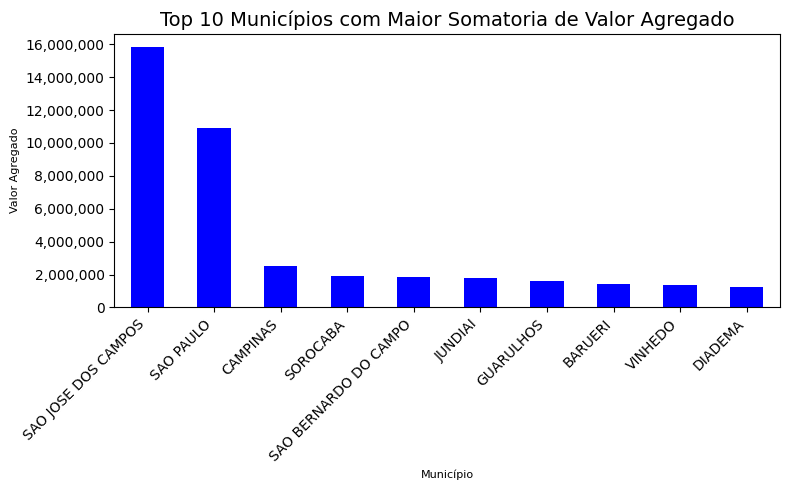

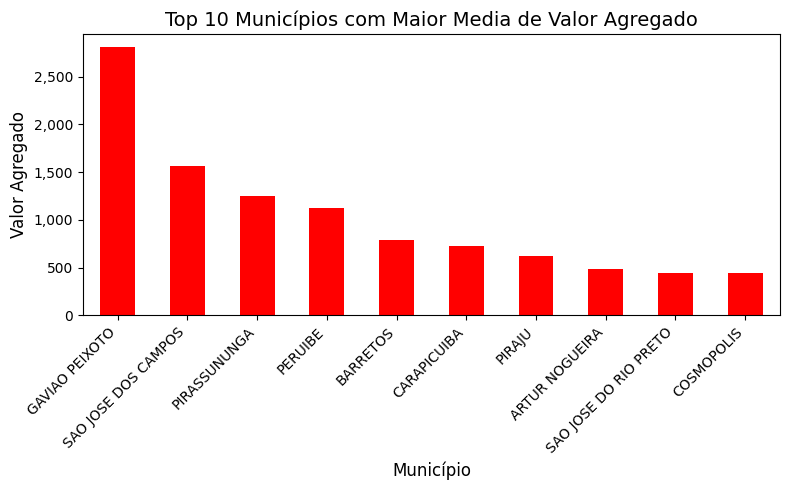

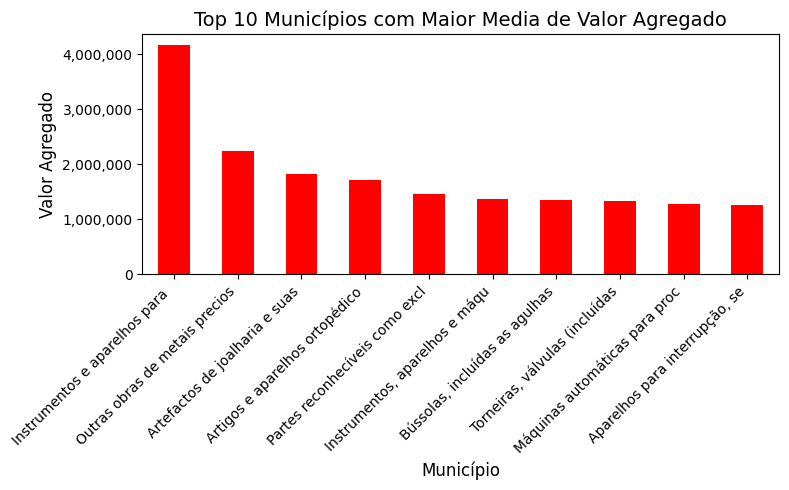

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Gerar gráfico de barras
plt.figure(figsize=(8, 5))  # Tamanho da figura
top_municipio.plot(kind="bar", color="blue")

# Adicionar título e rótulos
plt.title("Top 10 Municípios com Maior Somatoria de Valor Agregado", fontsize=14)
plt.xlabel("Município", fontsize=8)
plt.ylabel("Valor Agregado", fontsize=8)

# Formatar valores do eixo Y com separadores de milhar
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

#Exibir o gráfico
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo X para melhor visualização
plt.tight_layout()  # Ajusta o layout para não cortar os rótulos
plt.show()


###########################
# Gerar gráfico de barras
plt.figure(figsize=(8, 5))  # Tamanho da figura
municipios_top10.plot(kind="bar", color="red")

# Adicionar título e rótulos
plt.title("Top 10 Municípios com Maior Media de Valor Agregado", fontsize=14)
plt.xlabel("Município", fontsize=12)
plt.ylabel("Valor Agregado", fontsize=12)

# Formatar valores do eixo Y com separadores de milhar
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Exibir o gráfico
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo X para melhor visualização
plt.tight_layout()  # Ajusta o layout para não cortar os rótulos
plt.show()

###########################

# Gerar gráfico de barras
plt.figure(figsize=(8, 5))  # Tamanho da figura
top_item.plot(kind="bar", color="red")

# Adicionar título e rótulos
plt.title("Top 10 Municípios com Maior Media de Valor Agregado", fontsize=14)
plt.xlabel("Município", fontsize=12)
plt.ylabel("Valor Agregado", fontsize=12)

# Formatar valores do eixo Y com separadores de milhar
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Exibir o gráfico
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo X para melhor visualização
plt.tight_layout()  # Ajusta o layout para não cortar os rótulos
plt.show()

In [ ]:
df_mescla.head(20)

,index,ANO,MES,SH4,CO_PAIS,UF,CO_MUN,KG_LIQUIDO,VL_FOB,MUN,PRODUTO,PAIS,VALOR_AGREGADO
3,3,2013,6,8511,158,SP,3438709,166,4060,PIRACICABA,Aparelhos e dispositivos elétr,Chile,24.457831
5,5,2013,6,8421,589,SP,3431803,863,23068,MONTE MOR,"Centrifugadores, incluídos os",Peru,26.730012
6,6,2013,6,3302,158,SP,3405708,20210,180074,BARUERI,Misturas de substâncias odoríf,Chile,8.910143
8,8,2013,6,3006,815,SP,3422505,59,7571,ITAPEVI,Preparações e artigos farmacêu,Trinidad e Tobago,128.322034
9,9,2013,6,8482,589,SP,3448708,4134,94243,SAO BERNARDO DO CAMPO,"Rolamentos de esferas, de role",Peru,22.797049
12,12,2013,6,6402,244,SP,3406508,2326,126716,BIRIGUI,Outro calçado com sola exterio,Emirados Árabes Unidos,54.478074
14,14,2013,6,8409,63,SP,3405708,1869,38658,BARUERI,Partes reconhecíveis como excl,Argentina,20.683788
16,16,2013,6,3923,169,SP,3448708,1649,16836,SAO BERNARDO DO CAMPO,Artigos de transporte ou de em,Colômbia,10.209824
18,18,2013,6,7202,741,SP,3408504,100,1277,CACAPAVA,Ferro-ligas,Singapura,12.770000
21,22,2013,6,9017,40,SP,3418800,1,21,GUARULHOS,"Instrumentos de desenho, de tr",Angola,21.000000


In [ ]:
df_mescla.PAIS.value_counts()

,count
PAIS,
Argentina,31045
Estados Unidos,22167
Paraguai,20857
Chile,20513
Uruguai,16873
...,...
São Tomé e Príncipe,3
Tadjiquistão,2
Níger,2


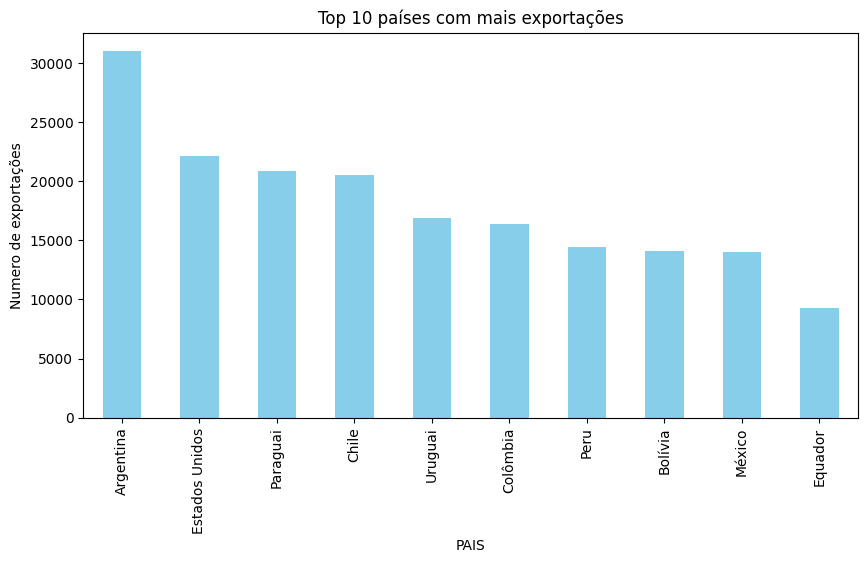

In [ ]:
import matplotlib.pyplot as plt

# Contar ocorrências
contagem_paises = df_mescla.PAIS.value_counts()

# Criar o gráfico
plt.figure(figsize=(10, 5))
contagem_paises.plot(kind='bar', color='skyblue')

# Personalizar o gráfico
plt.title('Top 10 países com mais exportações')
plt.xlabel('Países')
plt.ylabel('Numero de exportações')
plt.xticks(rotation=45)  # Rotacionar os nomes dos países para melhor visualização

contagem_paises.head(10).plot(kind='bar', color='skyblue')
plt.show()

In [ ]:
#os paises mais que mais exportam
muni = df_mescla.MUN.value_counts()

df_mescla["MUN"] = df_mescla["MUN"].str.upper().str.strip()
cidades_top = ["SAO PAULO", "CAMPINAS", "SAO BERNARDO DO CAMPO", "SOROCABA",
               "JUNDIAI", "GUARULHOS", "VINHEDO", "SAO JOSE DOS CAMPOS", "BARUERI", "INDAIATUBA"]
df_filtrado = df_mescla[df_mescla["MUN"].isin(cidades_top)]

# Contar o número de exportações por país
paises_exportacao = df_filtrado["PAIS"].value_counts()

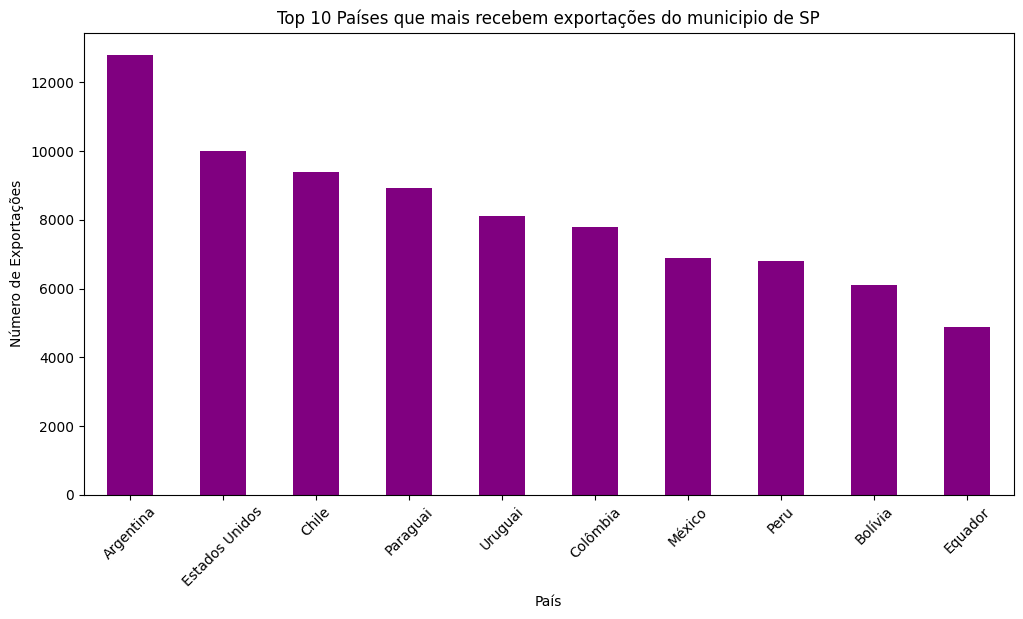

In [ ]:
import matplotlib.pyplot as plt

# Filtrando os municípios
df_mescla["MUN"] = df_mescla["MUN"].str.upper().str.strip()
cidades_top = ["SAO PAULO", "CAMPINAS", "SAO BERNARDO DO CAMPO", "SOROCABA",
               "JUNDIAI", "GUARULHOS", "VINHEDO", "SAO JOSE DOS CAMPOS", "BARUERI", "INDAIATUBA"]
df_filtrado = df_mescla[df_mescla["MUN"].isin(cidades_top)]

# Contar o número de exportações por país
paises_exportacao = df_filtrado["PAIS"].value_counts()

# Selecionar os 10 países mais exportados
top_10_paises = paises_exportacao.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
top_10_paises.plot(kind='bar', color='purple')

# Personalizar o gráfico
plt.xlabel("País")
plt.ylabel("Número de Exportações")
plt.title("Top 10 Países que mais recebem exportações do municipio de SP")
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.show()


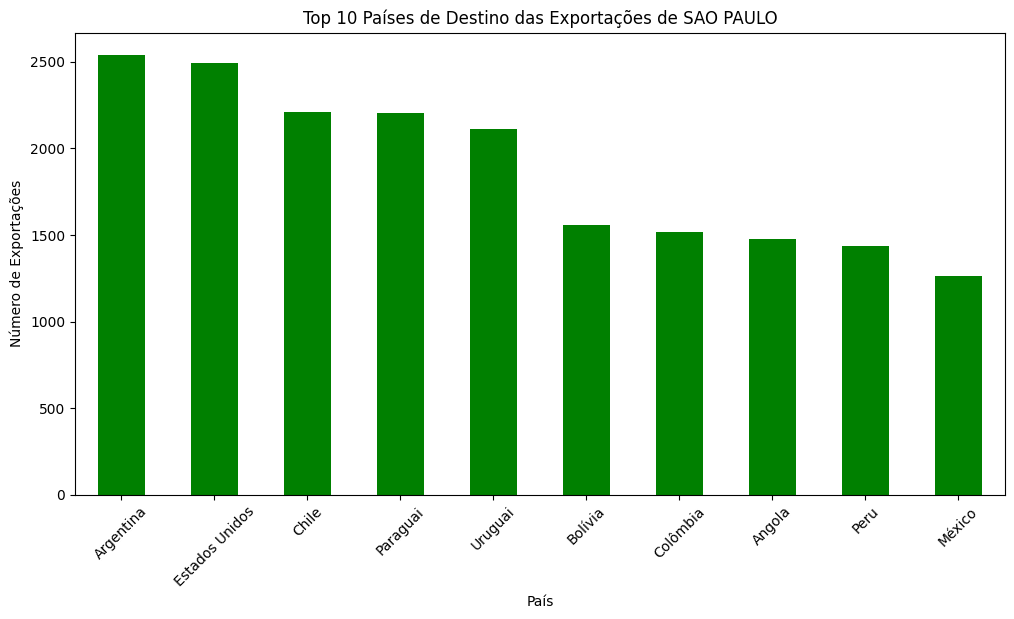

In [ ]:
import matplotlib.pyplot as plt

# Escolher o município de interesse (exemplo: 'SAO PAULO')
municipio_especifico = 'SAO PAULO'

df_municipio = df_mescla[df_mescla["MUN"].str.upper() == municipio_especifico.upper()]

# Contar o número de exportações por país
paises_exportacao = df_municipio["PAIS"].value_counts()

# Selecionar os 10 países mais exportados (se houver pelo menos 10)
top_10_paises = paises_exportacao.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
top_10_paises.plot(kind='bar', color='green')

# Personalizar o gráfico
plt.xlabel("País")
plt.ylabel("Número de Exportações")
plt.title(f"Top 10 Países de Destino das Exportações de {municipio_especifico}")
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.show()

# **Pesquisa de Informações por Municípios**

In [ ]:
# Escolher o município de interesse (exemplo: 'SAO PAULO')
municipio_especifico = input("Digite o nome do município: ")

df_municipio = df_mescla[df_mescla["MUN"].str.upper() == municipio_especifico.upper()]

# Corrected line: using a list of column names within double square brackets
display(df_municipio[['PRODUTO', 'PAIS', 'VALOR_AGREGADO']].sample(10))

Digite o nome do município: carapicuiba


,PRODUTO,PAIS,VALOR_AGREGADO
473066,Agentes de apresto ou de acaba,Argentina,0.764188
301903,"Parafusos, pernos ou pinos, ro",Alemanha,302.800000
178368,"Torneiras, válvulas (incluídas",Chile,12.816901
189451,"Díodos, transístores e disposi",Estados Unidos,65.038424
529448,"Bombas de ar ou de vácuo, comp",Paraguai,16.933333
426571,Partes e acessórios dos veícul,Peru,34.059051
100140,"Torneiras, válvulas (incluídas",Paraguai,13.407407
169651,"Artefactos de uso doméstico, d",França,121.779793
451956,"Díodos, transístores e disposi",China,147.500000
55104,Partes e acessórios dos veícul,Uruguai,37.783133


# **Pesquisa de Informação por Código**

In [ ]:
# Pesquisar por um código SH4 específico (exemplo: 4407)
codigo_sh4 = input("Digite o código SH4 que deseja pesquisar: ")

# Filtrar o DataFrame df_sh4 para encontrar o produto associado ao código SH4
produto_encontrado = df_sh4[df_sh4["SH4"] == int(codigo_sh4)]

# Verificar se um produto foi encontrado
if not produto_encontrado.empty:
  print(f"Produto encontrado para o código SH4 {codigo_sh4}:")
  print(produto_encontrado)
else:
  print(f"Nenhum produto encontrado para o código SH4 {codigo_sh4}.")


Digite o código SH4 que deseja pesquisar: 8511
Produto encontrado para o código SH4 8511:
       SH4                                            PRODUTO
5619  8511  Aparelhos e dispositivos elétricos de ignição ...


# **Pesquisar Top 10 Destino de Exportações por Município**

Digite o nome do município: carapicuiba


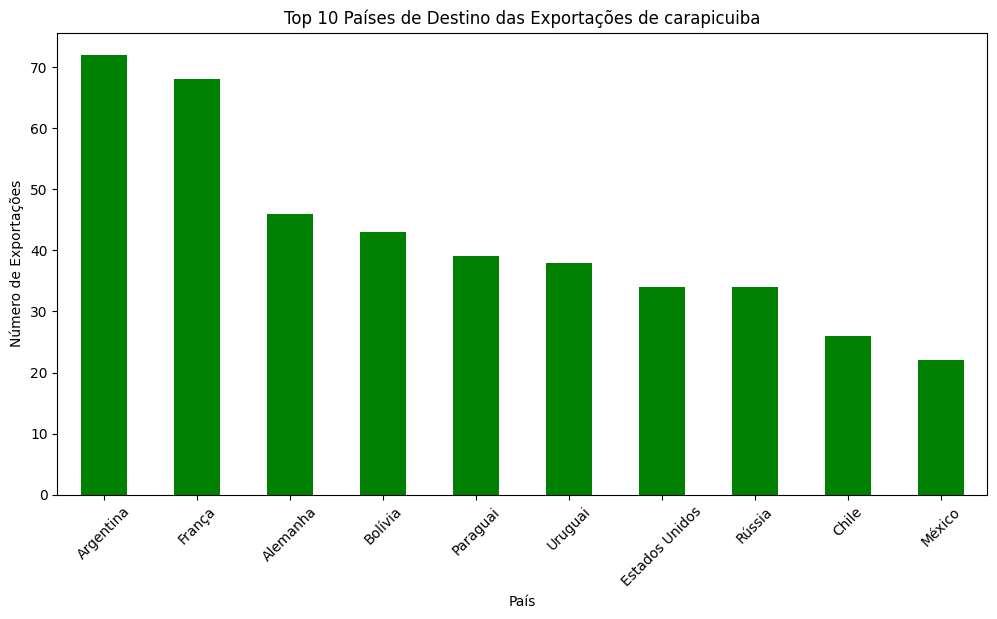

In [ ]:
import matplotlib.pyplot as plt

# Escolher o município de interesse (exemplo: 'SAO PAULO')
municipio_especifico = input("Digite o nome do município: ")

df_municipio = df_mescla[df_mescla["MUN"].str.upper() == municipio_especifico.upper()]

# Contar o número de exportações por país
paises_exportacao = df_municipio["PAIS"].value_counts()

# Selecionar os 10 países mais exportados (se houver pelo menos 10)
top_10_paises = paises_exportacao.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
top_10_paises.plot(kind='bar', color='green')

# Personalizar o gráfico
plt.xlabel("País")
plt.ylabel("Número de Exportações")
plt.title(f"Top 10 Países de Destino das Exportações de {municipio_especifico}")
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.show()


# **Comparação entre Municípios**


Digite o nome do primeiro município: carapicuiba
Digite o nome do segundo município: sao paulo


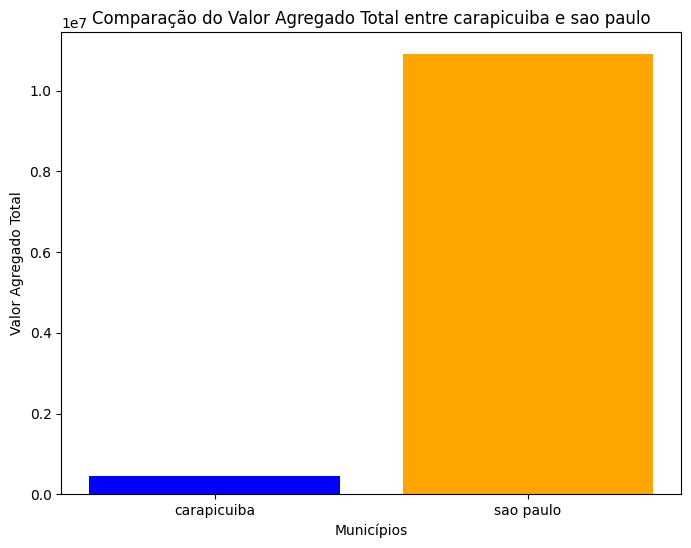

In [ ]:
# Escolha os municípios que deseja comparar
municipio1 = input("Digite o nome do primeiro município: ")
municipio2 = input("Digite o nome do segundo município: ")

# Filtrar o DataFrame para os municípios escolhidos
df_municipio1 = df_mescla[df_mescla["MUN"].str.upper() == municipio1.upper()]
df_municipio2 = df_mescla[df_mescla["MUN"].str.upper() == municipio2.upper()]

# Calcular o valor agregado total para cada município
valor_agregado_municipio1 = df_municipio1["VALOR_AGREGADO"].sum()
valor_agregado_municipio2 = df_municipio2["VALOR_AGREGADO"].sum()

# Criar um gráfico de barras para comparar os valores agregados
plt.figure(figsize=(8, 6))
plt.bar([municipio1, municipio2], [valor_agregado_municipio1, valor_agregado_municipio2], color=['blue', 'orange'])
plt.xlabel("Municípios")
plt.ylabel("Valor Agregado Total")
plt.title(f"Comparação do Valor Agregado Total entre {municipio1} e {municipio2}")
plt.show()

# **Gráfico de Funil**

Digite o nome do município: carapicuiba


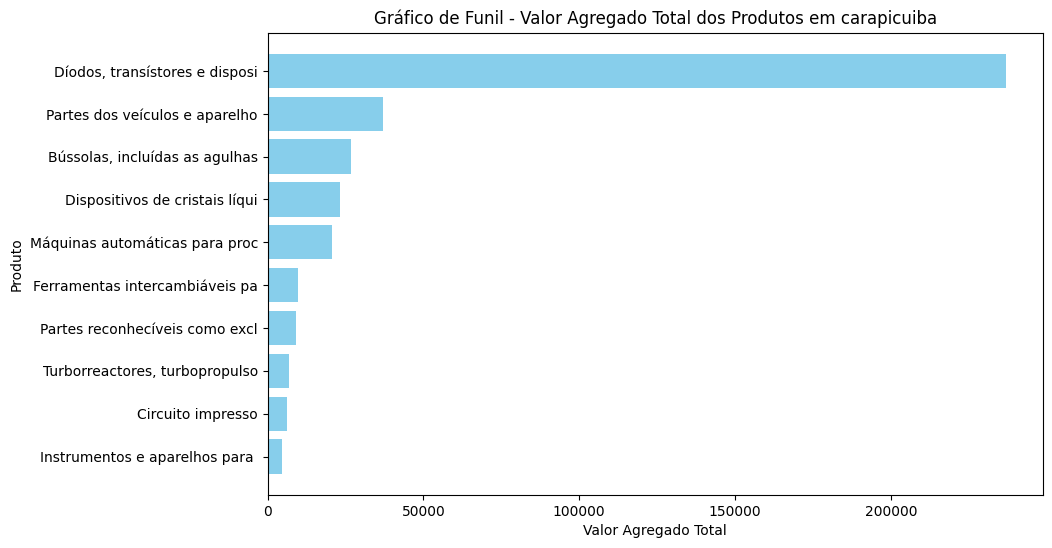

In [ ]:
# Escolher o município de interesse (exemplo: 'SAO PAULO')
municipio_especifico = input("Digite o nome do município: ")

df_municipio = df_mescla[df_mescla["MUN"].str.upper() == municipio_especifico.upper()]

# Agrupar por produto e calcular o valor agregado total por produto
valor_agregado_produto = df_municipio.groupby("PRODUTO")["VALOR_AGREGADO"].sum()

# Ordenar os produtos pelo valor agregado total em ordem decrescente
valor_agregado_produto = valor_agregado_produto.sort_values(ascending=False)

# Selecionar os top N produtos para o gráfico de funil (exemplo: top 10)
top_n_produtos = valor_agregado_produto.head(10)

# Criar o gráfico de funil
plt.figure(figsize=(10, 6))

# Plotar as barras do gráfico de funil
plt.barh(top_n_produtos.index, top_n_produtos.values, color="skyblue")

# Adicionar rótulos e título ao gráfico
plt.xlabel("Valor Agregado Total")
plt.ylabel("Produto")
plt.title(f"Gráfico de Funil - Valor Agregado Total dos Produtos em {municipio_especifico}")

# Inverter a ordem das barras para que o funil fique mais visual
plt.gca().invert_yaxis()

# Mostrar o gráfico
plt.show()


DIVERSIFICAÇÃO DE PRODUTOS - TOP 10 PRODUTOS EXPORTADOS POR SÃO JOSÉ DOS CAMPOS

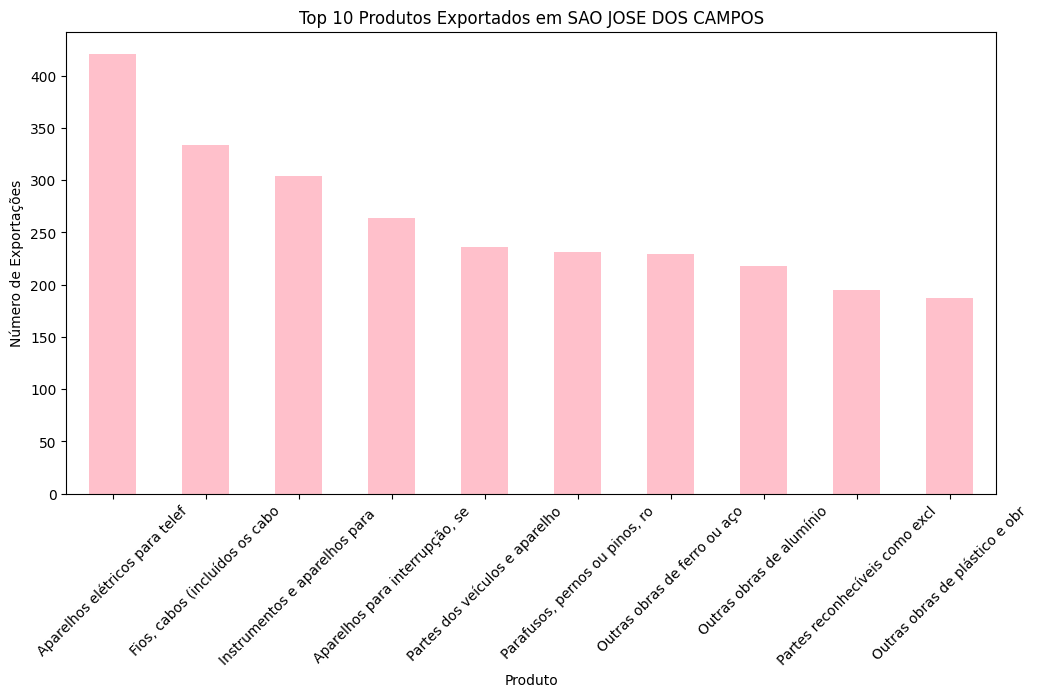

In [ ]:
import matplotlib.pyplot as plt

municipio_sjc = 'SAO JOSE DOS CAMPOS'

df_municipio = df_mescla[df_mescla["MUN"].str.upper() == municipio_sjc.upper()]

# Contar o número de ocorrências de cada produto
df_produtos = df_municipio["PRODUTO"].value_counts()

# Selecionar os 10 produtos mais exportados
top_10_produtos = df_produtos.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
top_10_produtos.plot(kind='bar', color='pink')

# Personalizar o gráfico
plt.xlabel("Produto")
plt.ylabel("Número de Exportações")
plt.title(f"Top 10 Produtos Exportados em {municipio_sjc}")
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.show()
